In [1]:
import pandas as pd
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns  
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("Layout1.csv")
df.head()

,No_Occupant,Met,Clo,CO2_Outdoor,CO2_Indoor,Outdoor_Temp,Indoor_Temp,Outdoor_Humidity,Indoor_Humidity,Energy_Consumption_Light,Energy_Consumption_HVAC,Energy_Consumption_Others,Total_Energy_Consumption
0,3,1.0,0.8,399.457034,1240.8769,30.374280,21.972234,89.9870,65.9872,0.000000,0.000000,0.000000,0.000000
1,4,0.9,0.6,414.111372,1354.8900,29.647268,18.383509,89.9654,65.9826,0.133301,2.952736,0.066271,3.152308
2,3,0.9,1.0,427.500606,1356.9000,32.290966,21.134369,89.6579,65.9780,0.121486,2.918206,0.057519,3.097212
3,4,0.8,1.0,426.535510,1456.9800,29.243687,21.967405,89.3504,65.9734,0.154176,1.452490,0.054401,1.661067
4,3,1.0,0.9,425.570414,1345.0900,30.309128,23.240612,89.0429,65.9688,0.074840,2.305990,0.054861,2.435691


In [3]:
 #displaying categories of values for each column with its count
col_names = list(df.columns.values) #update columns names

for i in col_names:
    print(df[i].value_counts(dropna=False))

No_Occupant
3    575
4    381
2    233
5    219
1    202
Name: count, dtype: int64
Met
0.80    171
0.95    126
0.98    123
0.70    120
0.96     95
1.10     92
0.91     82
0.99     79
0.90     79
0.87     76
1.11     74
0.85     69
0.89     58
0.97     50
0.83     49
0.60     48
1.12     48
1.21     39
0.86     39
1.00     31
0.84     20
1.30     19
1.20     14
0.88      4
1.13      2
1.22      1
1.33      1
0.82      1
Name: count, dtype: int64
Clo
0.656    185
0.887     87
0.832     80
0.821     79
0.843     79
        ... 
0.634      1
0.601      1
0.612      1
0.645      1
0.623      1
Name: count, Length: 63, dtype: int64
CO2_Outdoor
445.444032    79
445.715816    78
445.172248    78
444.628679    76
444.900464    75
              ..
445.254658     1
446.259384     1
445.987600     1
442.726190     1
439.226302     1
Name: count, Length: 95, dtype: int64
CO2_Indoor
1466.7839    79
1458.2292    78
1475.3386    78
1492.4480    76
1483.8933    75
             ..
1432.5651     1
1441.1

<Axes: >

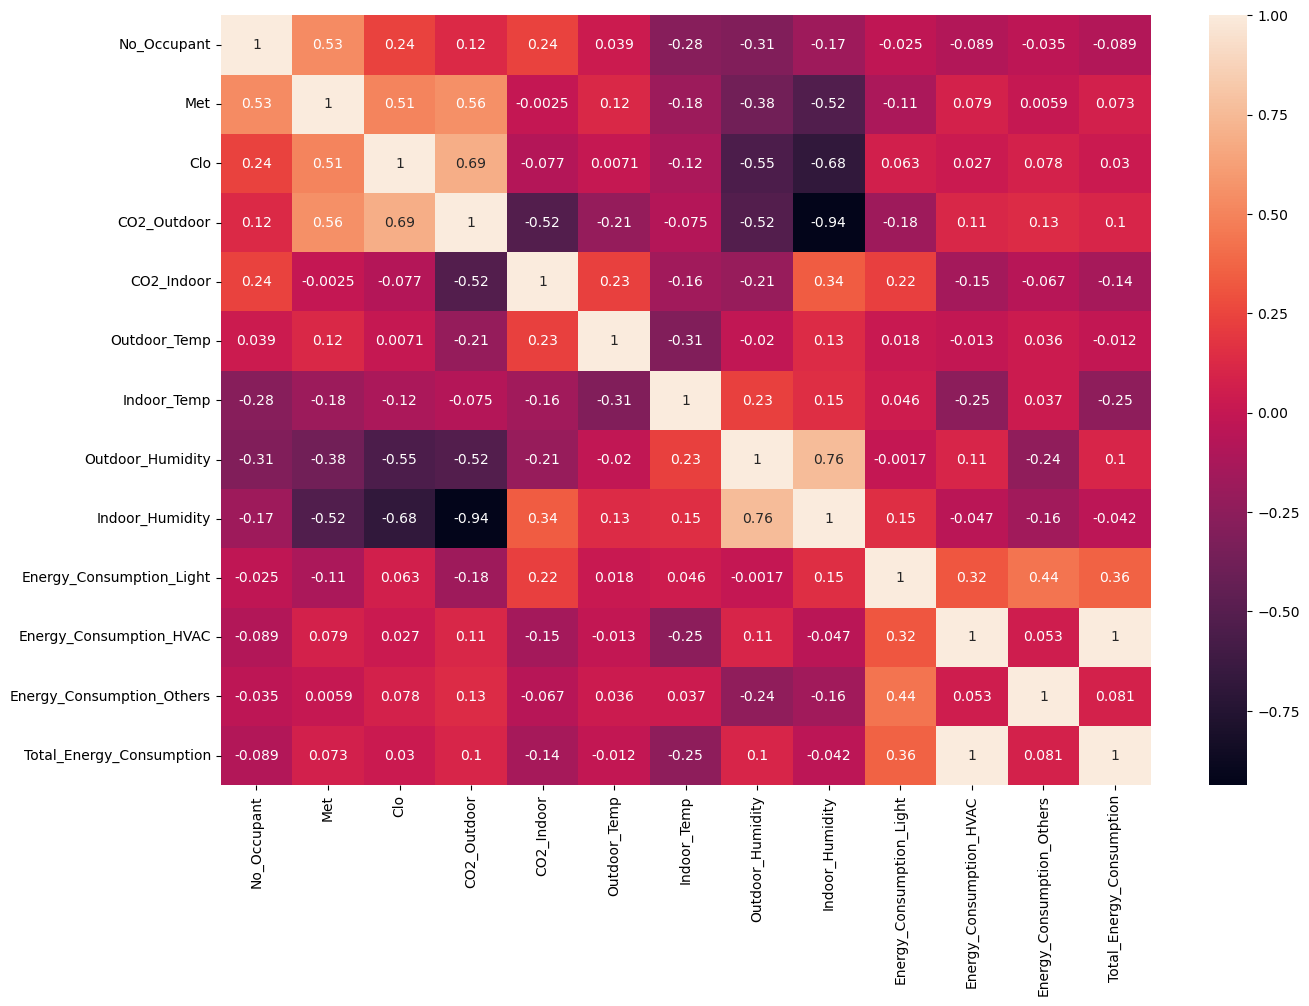

In [4]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [5]:
inputs = df.drop(['Energy_Consumption_Light','Energy_Consumption_HVAC', 'Energy_Consumption_Others', 'Total_Energy_Consumption'], axis=1)

In [6]:
target = df['Total_Energy_Consumption']

In [7]:
inputs

,No_Occupant,Met,Clo,CO2_Outdoor,CO2_Indoor,Outdoor_Temp,Indoor_Temp,Outdoor_Humidity,Indoor_Humidity
0,3,1.00,0.800,399.457034,1240.8769,30.374280,21.972234,89.98700,65.987200
1,4,0.90,0.600,414.111372,1354.8900,29.647268,18.383509,89.96540,65.982600
2,3,0.90,1.000,427.500606,1356.9000,32.290966,21.134369,89.65790,65.978000
3,4,0.80,1.000,426.535510,1456.9800,29.243687,21.967405,89.35040,65.973400
4,3,1.00,0.900,425.570414,1345.0900,30.309128,23.240612,89.04290,65.968800
...,...,...,...,...,...,...,...,...,...
1605,3,0.98,0.568,425.160138,1421.7550,31.258981,21.849982,84.91180,61.949350
1606,3,0.96,0.579,426.164864,1407.4120,33.412066,22.078639,85.20260,61.667175
1607,1,0.85,0.656,438.410500,1328.4249,32.276028,23.272368,90.54236,59.708340
1608,1,0.85,0.656,437.625400,1321.9796,32.024826,20.695245,90.37248,59.949625


In [8]:
target

0       0.000000
1       3.152308
2       3.097212
3       1.661067
4       2.435691
          ...   
1605    2.760807
1606    2.651721
1607    1.901029
1608    2.833040
1609    4.493445
Name: Total_Energy_Consumption, Length: 1610, dtype: float64

<Axes: >

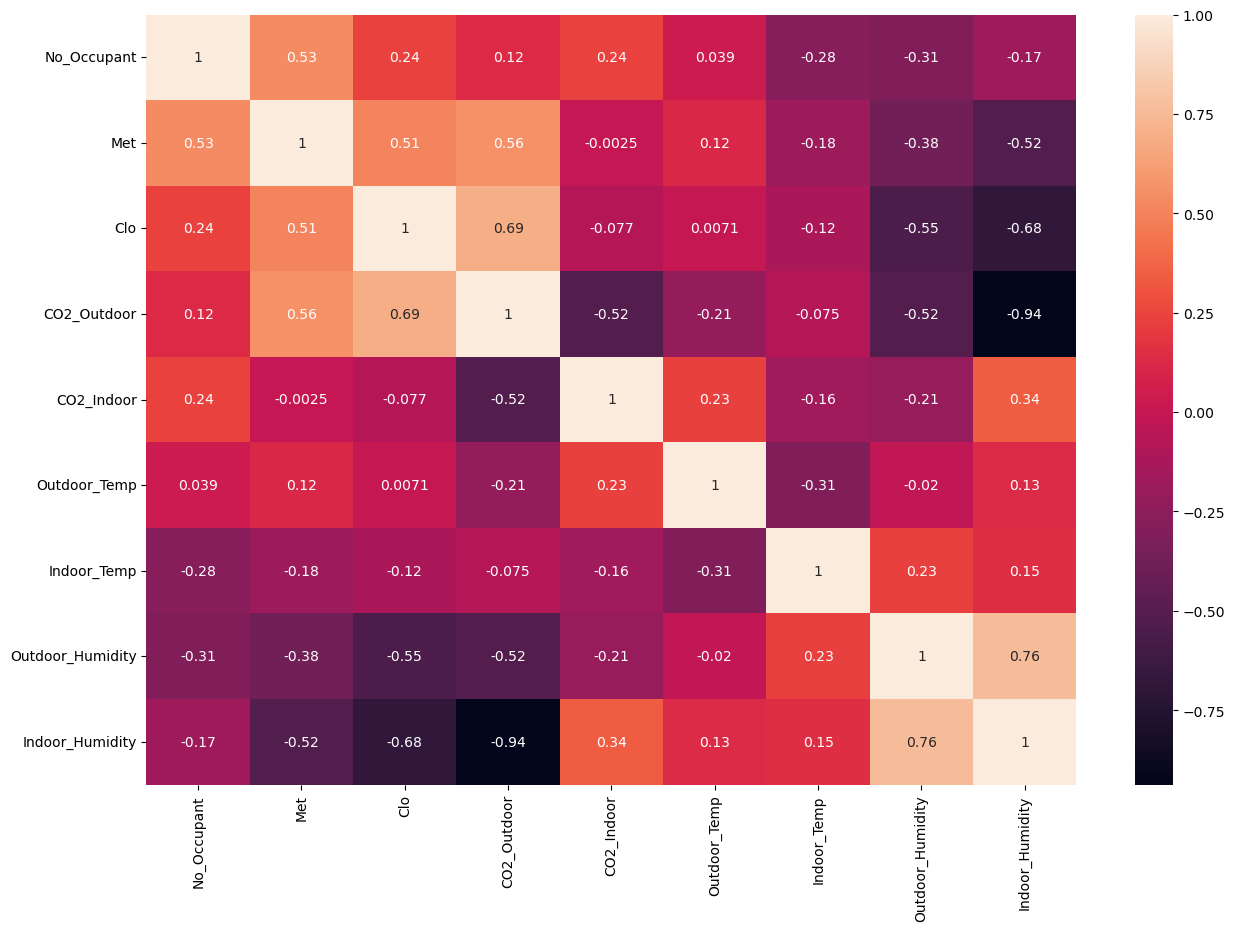

In [9]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(inputs.corr(),annot=True)

In [10]:
from sklearn.model_selection import train_test_split
X = inputs  
y = target

In [11]:
df['Total_Energy_Consumption'].value_counts()

Total_Energy_Consumption
2.696866    79
2.189607    78
2.525352    78
2.953962    76
1.982639    75
            ..
3.980170     1
4.439695     1
3.883525     1
2.455324     1
2.659507     1
Name: count, Length: 95, dtype: int64

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state =42) # 75 - 25 split   (test_size=0.20)

In [15]:
rfc = RandomForestRegressor(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 42)

In [16]:
rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=3, n_estimators=500,
                      random_state=42)

In [17]:
rfc.score(X_train, y_train)

0.7098980547407314

In [18]:
y_predict = rfc.predict(X_test)

result = rfc.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.7092836948681001


In [19]:
y_predict = rfc.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.09
RMSE: 0.30


In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [21]:
r2 = r2_score(y_test, y_predict)
print('\nR2 =', r2,) 


R2 = 0.7092836948681001


Text(0, 0.5, 'Features')

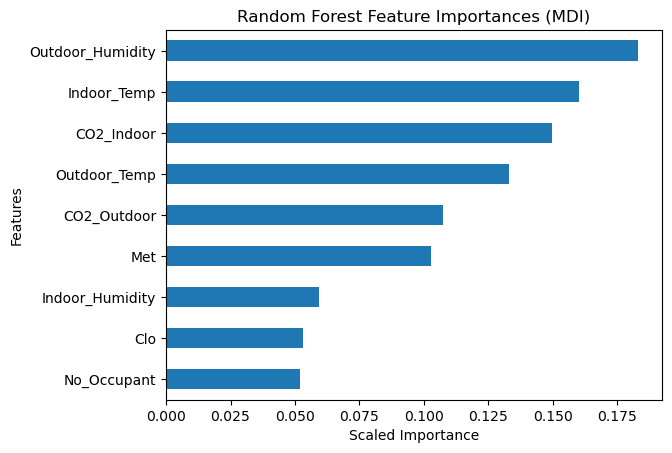

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
feat_importances = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')
plt.title('Random Forest Feature Importances (MDI)')
plt.xlabel('Scaled Importance')
plt.ylabel('Features')

In [23]:
# Combine feature names and importances
feature_importances_list = list(zip(feat_importances.index, feat_importances.values))

# Print the combined feature names and importances
for feature, importance in feature_importances_list:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: No_Occupant, Importance: 0.05197922897607236
Feature: Clo, Importance: 0.05304519855759079
Feature: Indoor_Humidity, Importance: 0.05917305170027195
Feature: Met, Importance: 0.10270169957474251
Feature: CO2_Outdoor, Importance: 0.10736002387923142
Feature: Outdoor_Temp, Importance: 0.1328535971799147
Feature: CO2_Indoor, Importance: 0.14979476765438698
Feature: Indoor_Temp, Importance: 0.15994306640549627
Feature: Outdoor_Humidity, Importance: 0.18314936607229296


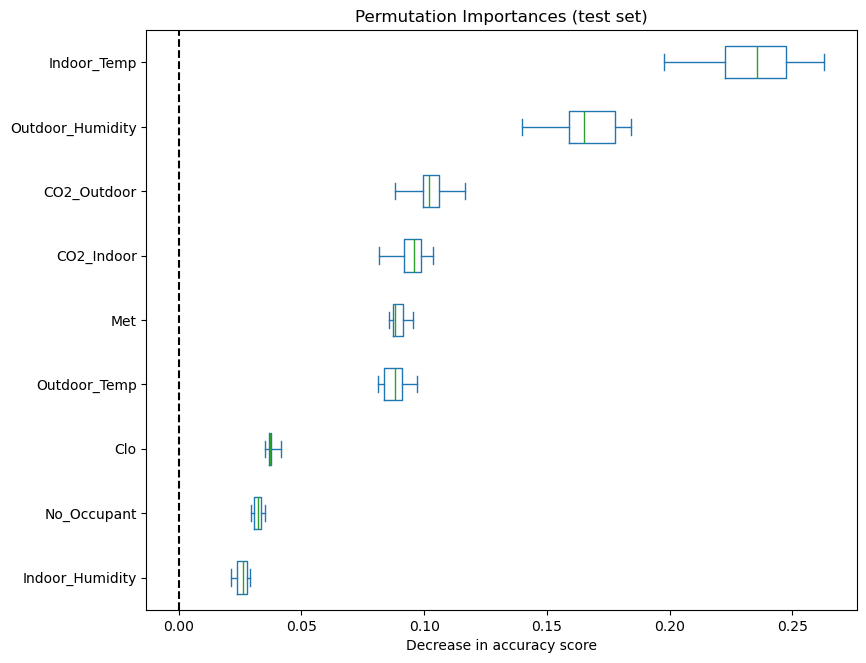

<Figure size 2500x1500 with 0 Axes>

In [24]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

In [25]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

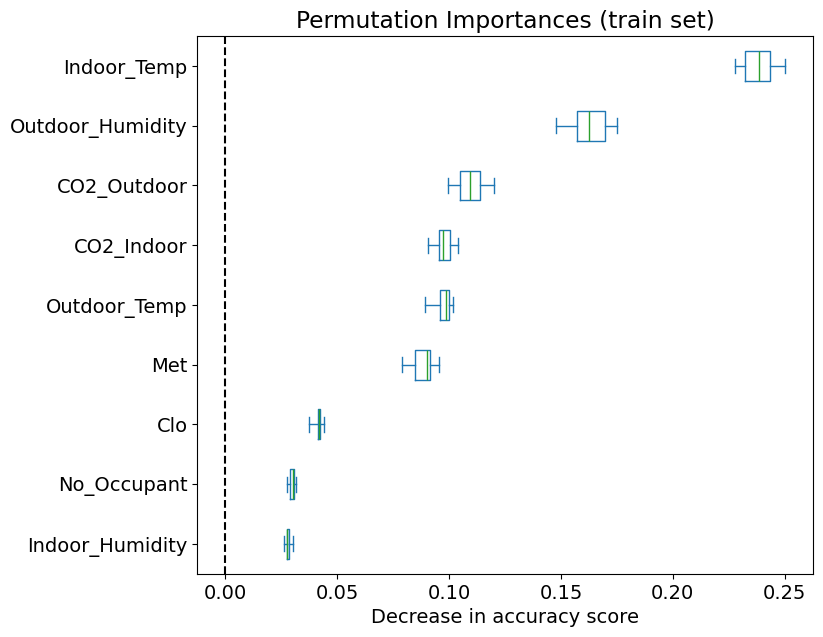

<Figure size 2500x1500 with 0 Axes>

In [26]:
result = permutation_importance(
    rfc, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

In [27]:
import numpy as np
import pandas as pd

In [28]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

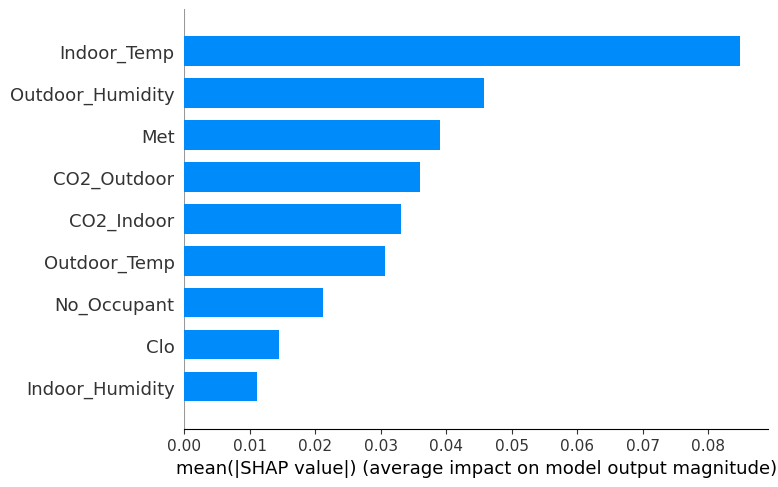

In [29]:
import shap
shap.summary_plot(shap_values, X_test, plot_type="bar",)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Sensitivity Analysis

Outdoor_Humidity: 0.44204202797516134
Indoor_Temp: 0.2781072707630916
CO2_Indoor: 0.22548152444680358
CO2_Outdoor: 0.17709601502878491
Outdoor_Temp: 0.12218397653962554
Met: 0.10963213189921595
Clo: 0.0492556962127465
No_Occupant: 0.03302245651663882
Indoor_Humidity: 0.029570273975364603


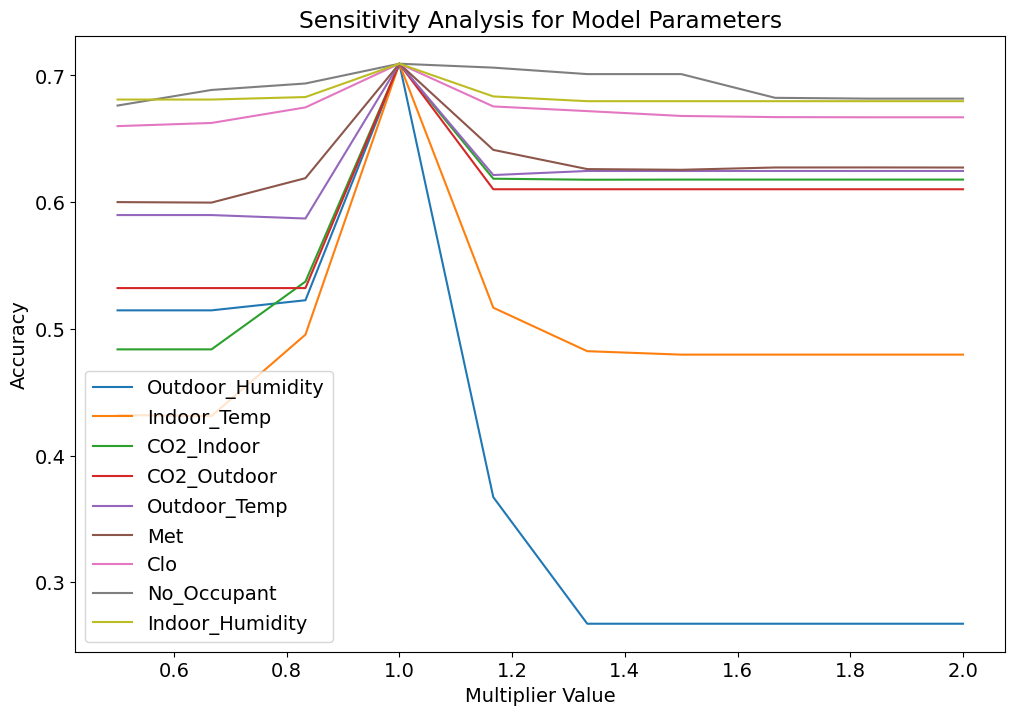

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters to analyze
parameters = ['No_Occupant', 'Met', 'Clo', 'CO2_Outdoor', 'CO2_Indoor', 'Outdoor_Temp', 'Indoor_Temp', 'Outdoor_Humidity', 'Indoor_Humidity']

# Initialize a dictionary to store the sensitivity coefficients
sensitivity_coefficients = {}

# Perform sensitivity analysis for each parameter
for parameter in parameters:
    results = []
    for value in np.linspace(0.5, 2.0, 10):  # Vary the parameter value from 0.5 to 2.0
        X_test_modified = X_test.copy()  # Create a copy of the original test data
        X_test_modified[parameter] = X_test_modified[parameter] * value  # Modify the parameter value

        # Predict using the modified data
        y_predict_modified = rfc.predict(X_test_modified)

        # Evaluate the model with the modified parameter
        result = rfc.score(X_test_modified, y_test)
        results.append(result)

    # Calculate sensitivity coefficient as the range of model performance
    sensitivity_coefficient = max(results) - min(results)
    sensitivity_coefficients[parameter] = sensitivity_coefficient

# Sort parameters by sensitivity coefficient in descending order
sorted_parameters = sorted(sensitivity_coefficients, key=sensitivity_coefficients.get, reverse=True)

# Print the sensitivity coefficients for each parameter
for parameter in sorted_parameters:
    print(f'{parameter}: {sensitivity_coefficients[parameter]}')

# Plot all sensitivity analyses in a single frame
plt.figure(figsize=(12, 8))
for parameter in sorted_parameters:
    results = []
    for value in np.linspace(0.5, 2.0, 10):  # Vary the parameter value from 0.5 to 2.0
        X_test_modified = X_test.copy()  # Create a copy of the original test data
        X_test_modified[parameter] = X_test_modified[parameter] * value  # Modify the parameter value

        # Predict using the modified data
        y_predict_modified = rfc.predict(X_test_modified)

        # Evaluate the model with the modified parameter
        result = rfc.score(X_test_modified, y_test)
        results.append(result)

    plt.plot(np.linspace(0.5, 2.0, 10), results, label=parameter)

plt.xlabel('Multiplier Value')
plt.ylabel('Accuracy')
plt.title('Sensitivity Analysis for Model Parameters')
plt.legend()
plt.show()

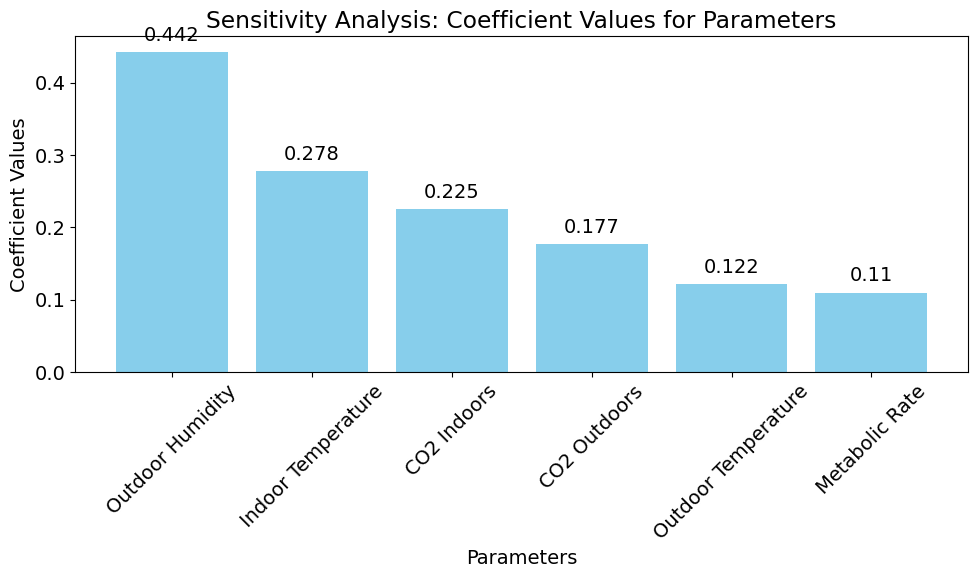

In [37]:
import matplotlib.pyplot as plt

# Parameter names
parameters = ['Outdoor Humidity', 'Indoor Temperature', 'CO2 Indoors', 'CO2 Outdoors', 'Outdoor Temperature', 'Metabolic Rate']

# Corresponding coefficient values
coefficients = [0.442, 0.278, 0.225, 0.177, 0.122, 0.110]

# Create a bar graph with coefficient values for each parameter
plt.figure(figsize=(10, 6))
plt.bar(parameters, coefficients, color='skyblue')

# Add coefficient values as text on the bars
for i, v in enumerate(coefficients):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom')

plt.xlabel('Parameters')
plt.ylabel('Coefficient Values')
plt.title('Sensitivity Analysis: Coefficient Values for Parameters')
plt.xticks(rotation=45)
plt.tight_layout()

# Save or display the plot
plt.show()

# https://stackoverflow.com/questions/73523144/cross-validation-for-random-forest-regression

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
      
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90,],
    'max_features': [2, 3, 4, 5],
    'n_estimators': [100, 200,]}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0), param_grid=param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42))

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=0),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [100, 200]})

In [68]:
grid_search.best_score_

0.9499336729524289

In [69]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 80, 'max_features': 5, 'n_estimators': 100}

In [70]:
grid_search.score(X_test,y_test)

0.9138060651571053

In [71]:
rf = RandomForestRegressor(bootstrap = grid_search.best_params_['bootstrap'],
                           n_estimators = grid_search.best_params_['n_estimators'],
                           max_features = grid_search.best_params_['max_features'],
                           max_depth = grid_search.best_params_['max_depth'],
                           random_state = 0)
    
rf.fit(X_train, y_train)

n_scores = cross_val_score(rf, X_train, y_train,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42)).mean()

prediction = rf.predict(X_test)

In [72]:
n_scores = cross_val_score(grid_search, X_train, y_train,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42)).mean()
grid_search.predict(X_test)

array([1.78298374, 2.83303964, 2.9539618 , 2.69686582, 3.0573923 ,
       2.18960743, 2.9539618 , 2.69686582, 1.98263949, 2.18960743,
       3.2643429 , 2.55911942, 2.52535177, 1.98263949, 2.35348321,
       4.49344533, 2.84861899, 1.5589794 , 2.06622139, 1.9010292 ,
       2.71852431, 2.34583307, 4.49344533, 1.66106717, 2.9539618 ,
       3.09860356, 2.5649131 , 2.18960743, 3.02800448, 2.06622139,
       2.46294875, 2.35151146, 2.34583307, 3.15582506, 3.09721203,
       3.58715573, 2.06603842, 2.55911942, 2.83303964, 2.06622139,
       2.84060794, 2.69686582, 2.34583307, 1.5589794 , 2.35151146,
       2.87377936, 2.46294875, 2.35151146, 2.43485852, 2.18960743,
       2.35348321, 2.84861899, 2.75099831, 3.2643429 , 1.98263949,
       1.9010292 , 2.69686582, 2.34583307, 2.10023794, 2.10023794,
       2.46294875, 2.52535177, 2.43569146, 2.3466323 , 1.9010292 ,
       2.72228811, 1.98263949, 2.9539618 , 2.46294875, 2.18960743,
       3.38596501, 1.98263949, 2.52535177, 1.86184529, 1.81867

First few rows of the DataFrame:
   No_Occupant  Met  Clo  CO2_Outdoor  CO2_Indoor  Outdoor_Temp  Indoor_Temp  \
0            3  1.0  0.8   399.457034   1240.8769     30.374280    21.972234   
1            4  0.9  0.6   414.111372   1354.8900     29.647268    18.383509   
2            3  0.9  1.0   427.500606   1356.9000     32.290966    21.134369   
3            4  0.8  1.0   426.535510   1456.9800     29.243687    21.967405   
4            3  1.0  0.9   425.570414   1345.0900     30.309128    23.240612   

   Outdoor_Humidity  Indoor_Humidity  Energy_Consumption_Light  \
0           89.9870          65.9872                  0.000000   
1           89.9654          65.9826                  0.133301   
2           89.6579          65.9780                  0.121486   
3           89.3504          65.9734                  0.154176   
4           89.0429          65.9688                  0.074840   

   Energy_Consumption_HVAC  Energy_Consumption_Others  \
0                 0.000000      

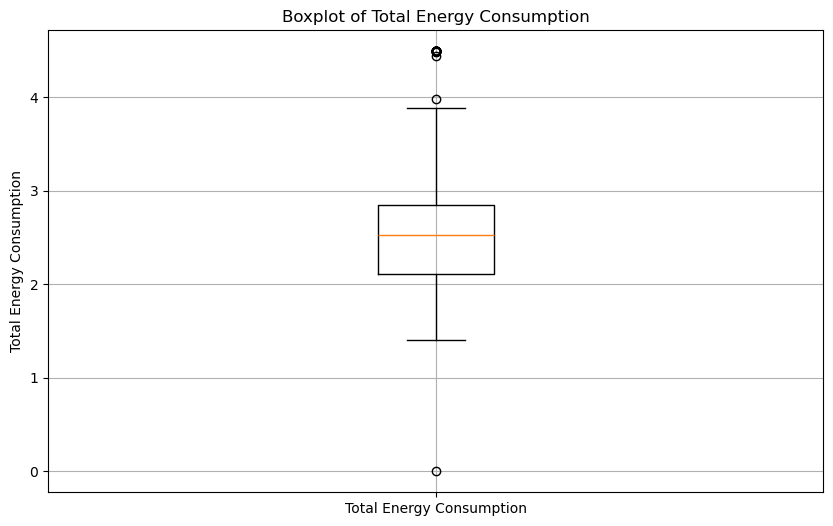

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("Layout1.csv")

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Total_Energy_Consumption'].quantile(0.25)
Q3 = df['Total_Energy_Consumption'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Print the results
print(f'Q1 (25th percentile): {Q1}')
print(f'Q3 (75th percentile): {Q3}')
print(f'IQR (Interquartile Range): {IQR}')

# Determine lower and upper thresholds for outlier detection
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

print(f'Lower Threshold for Outliers: {lower_threshold}')
print(f'Upper Threshold for Outliers: {upper_threshold}')

# Create the boxplot for the 'Total_Energy_Consumption' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['Total_Energy_Consumption'])

# Add title and labels
plt.title('Boxplot of Total Energy Consumption')
plt.ylabel('Total Energy Consumption')
plt.xticks([1], ['Total Energy Consumption'])  # Customize x-ticks if needed
plt.grid()

# Show the plot
plt.show()